In [37]:
# подгружаем необходимые библиотеки
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import matplotlib.font_manager 
%matplotlib inline

In [23]:
df_glass = pd.read_csv('glass.csv')
df_glass.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [24]:
df_glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [25]:
df_glass.Type.value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

<Axes: >

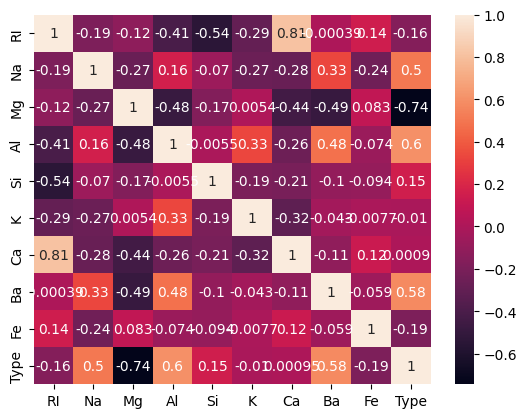

In [5]:
corr_matrix = df_glass.corr()
sns.heatmap(corr_matrix, annot=True)

In [22]:
df_glass.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [65]:
def get_accuracy(X, y, random_seed=137, model=RandomForestClassifier(), test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
X = df_glass.loc[:, df_glass.columns != "Type"]
y = df_glass[['Type']].values.ravel()

In [66]:
get_accuracy(X, y)

0.7906976744186046

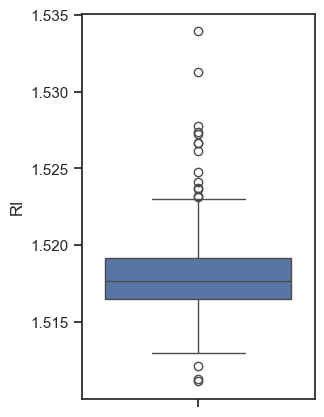

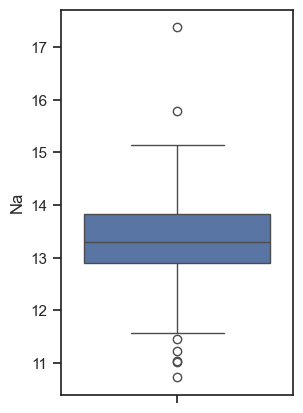

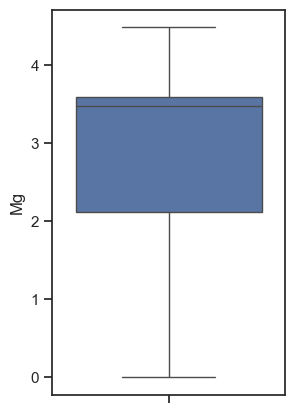

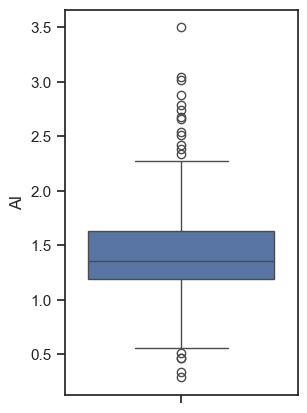

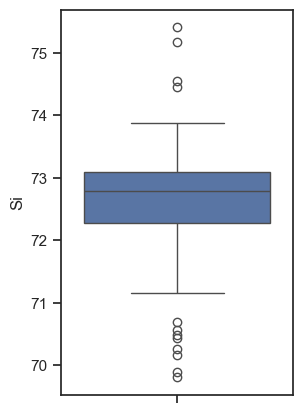

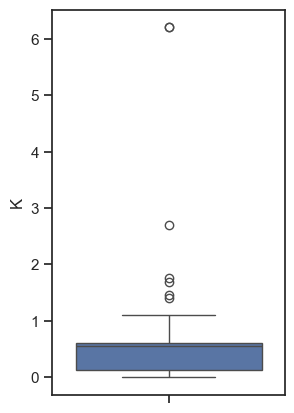

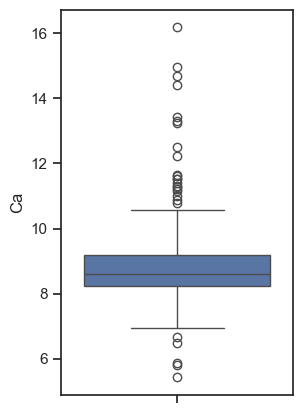

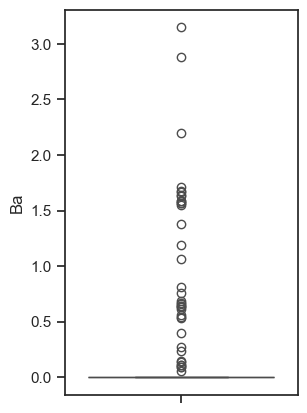

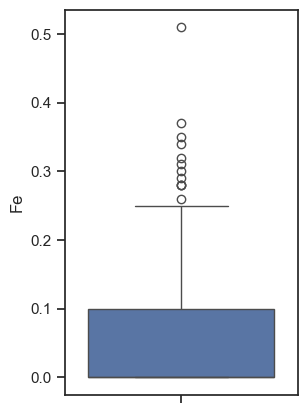

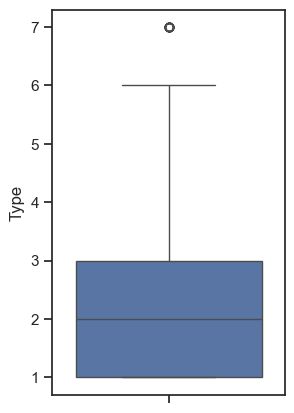

In [85]:
for i in df_glass.columns:
    plt.figure(figsize=(3,5))
    sns.boxplot(df_glass[i])
    plt.show()

<Figure size 300x500 with 0 Axes>

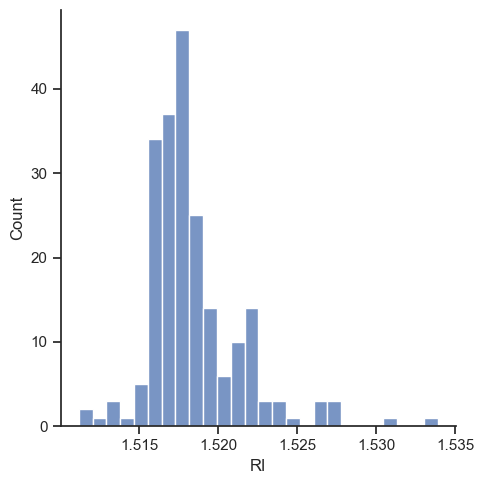

<Figure size 300x500 with 0 Axes>

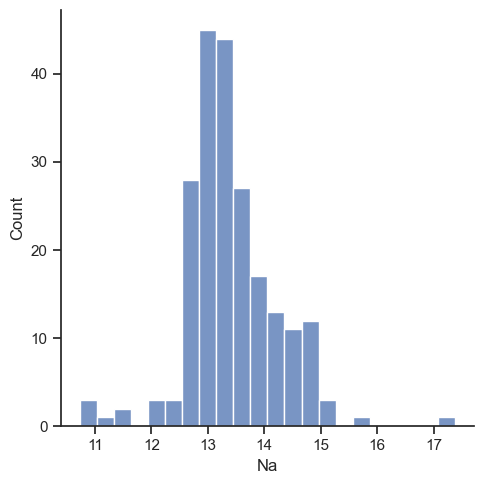

<Figure size 300x500 with 0 Axes>

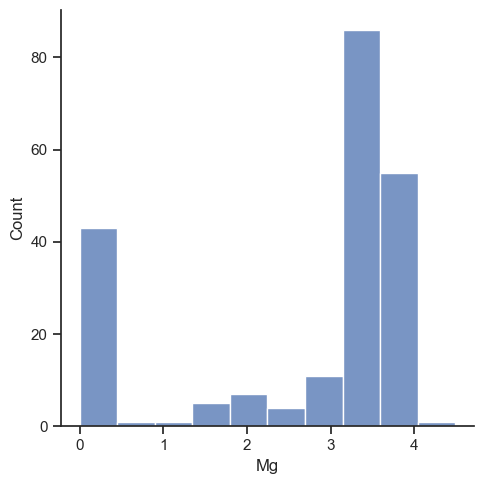

<Figure size 300x500 with 0 Axes>

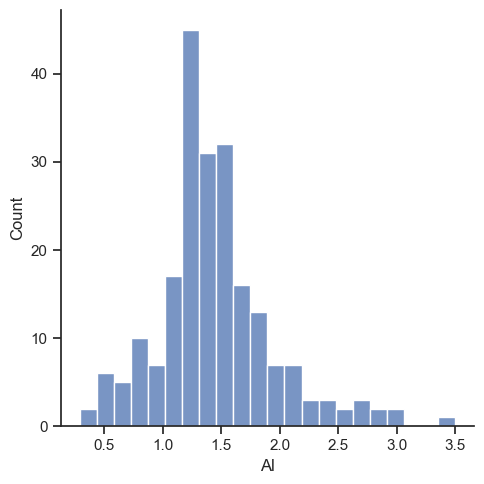

<Figure size 300x500 with 0 Axes>

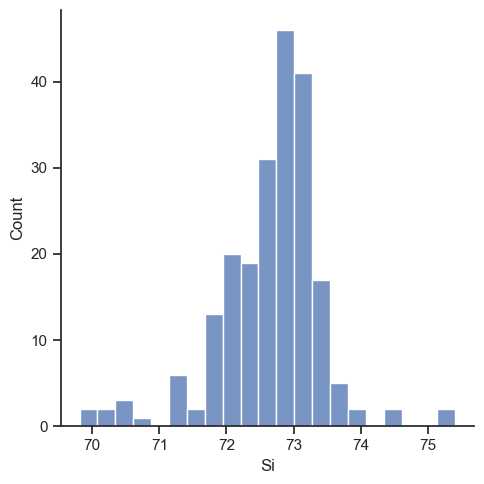

<Figure size 300x500 with 0 Axes>

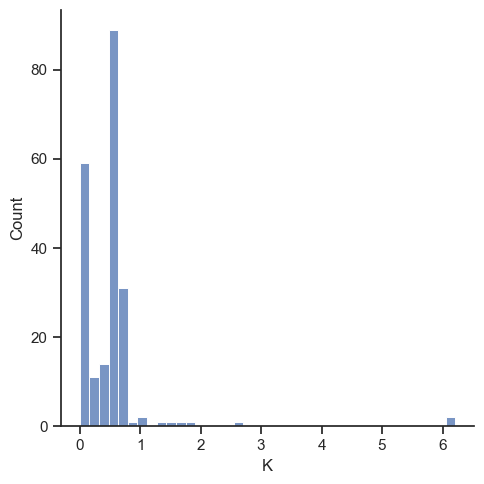

<Figure size 300x500 with 0 Axes>

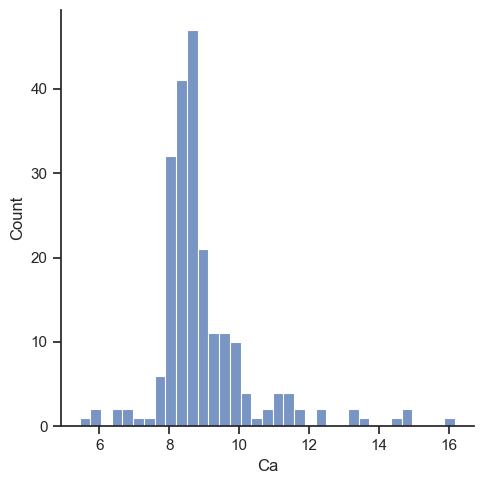

<Figure size 300x500 with 0 Axes>

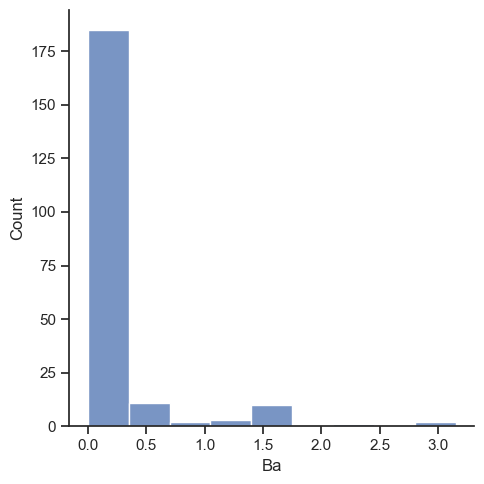

<Figure size 300x500 with 0 Axes>

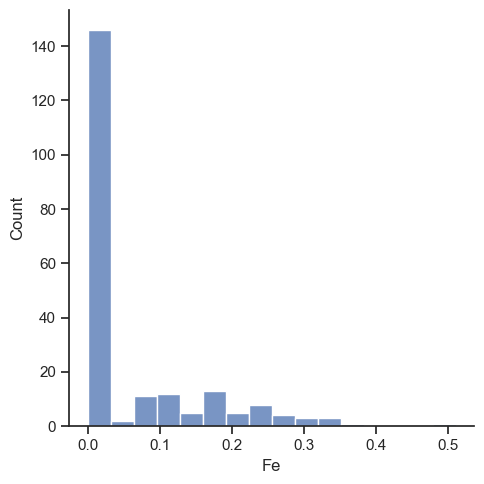

<Figure size 300x500 with 0 Axes>

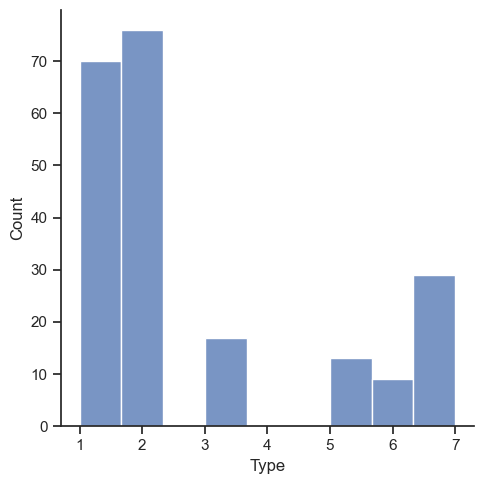

In [76]:
for i in df_glass.columns:
    plt.figure(figsize=(3, 5))
    sns.set_theme(style="ticks")
    sns.displot(df_glass[i])
    plt.show()

Это трындец, в некоторых колонках одни выбросы))))

In [87]:
df_glass_shot = df_glass[
    (df_glass['RI'] < 1.523) &
    (df_glass['RI'] > 1.512) &
    (df_glass['Na'] < 15.2) &
    (df_glass['Na'] > 11.6) &
    (df_glass['Al'] < 2.5) &
    (df_glass['Al'] > 0.6) &
    (df_glass['Si'] < 74) &
    (df_glass['Si'] > 71) &
    (df_glass['K'] < 1.2) &
    (df_glass['Ca'] < 11.6) &
    (df_glass['Ca'] > 7) &
    (df_glass['Fe'] < 0.25)
]

In [89]:
X2 = df_glass_shot.loc[:, df_glass_shot.columns != "Type"]
y2 = df_glass_shot[['Type']].values.ravel()

In [90]:
get_accuracy(X2, y2)

0.8787878787878788

Выбросы иногда даже хуже чем пропуски значений. Выбросы могут быть и реальные - просто редкие случаи в выборке, так могут быть и ошибки, не всегда можно одназачно определить выброс.
Для улучшения качества модели, нужно хотя бы попробовать провести обучение игнорируя выбросы. Мне кажется если выбросы лежат за пределами 3 сигм и единичны, то их однозначно нужно удалить.
В своем эксперименте, мы значительно улучшили качество модели путем наложения ограничений на знчения атрибутов